In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [7]:
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
data = data.dropna()
data = data[data['Quantity'] > 0]

In [9]:
basket = data[data['Country'] == 'United Kingdom']
basket = basket.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\matth\AppData\Local\Temp\ipykernel_13244\898119562.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [25]:
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets

C:\Users\matth\Documents\GitHub\410Labs\.venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.078083,(ASSORTED COLOUR BIRD ORNAMENT)
1,0.055739,(HEART OF WICKER SMALL)
2,0.086912,(JUMBO BAG RED RETROSPOT)
3,0.059823,(LUNCH BAG BLACK SKULL.)
4,0.052976,(LUNCH BAG CARS BLUE)
5,0.050934,(LUNCH BAG PINK POLKADOT)
6,0.067271,(LUNCH BAG RED RETROSPOT)
7,0.052436,(LUNCH BAG SPACEBOY DESIGN )
8,0.050213,(LUNCH BAG SUKI DESIGN )
9,0.056340,(NATURAL SLATE HEART CHALKBOARD )


In [22]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets =2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.041444,0.045528,0.027269,0.657971,14.451925,1.0,0.025382,2.790617,0.971049,0.456740,0.641656,0.628458
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.045528,0.041444,0.027269,0.598945,14.451925,1.0,0.025382,2.390084,0.975204,0.456740,0.581605,0.628458
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037660,0.044567,0.027509,0.730463,16.390122,1.0,0.025831,3.544712,0.975734,0.502744,0.717890,0.673857
3,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.044567,0.037660,0.027509,0.617251,16.390122,1.0,0.025831,2.514283,0.982788,0.502744,0.602272,0.673857
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.036759,0.029611,0.024266,0.660131,22.293137,1.0,0.023177,2.855182,0.991593,0.576320,0.649760,0.739802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023004,0.036759,0.020482,0.890339,24.221015,1.0,0.019636,8.783841,0.981287,0.521407,0.886155,0.723764
72,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024266,0.040723,0.020482,0.844059,20.726763,1.0,0.019494,6.151553,0.975423,0.460189,0.837439,0.673505
73,(ROSES REGENCY TEACUP AND SAUCER ),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.040723,0.024266,0.020482,0.502950,20.726763,1.0,0.019494,1.963050,0.992157,0.460189,0.490589,0.673505
74,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.036759,0.023004,0.020482,0.557190,24.221015,1.0,0.019636,2.206352,0.995300,0.521407,0.546763,0.723764


In [26]:
filtered_rules = rules[rules['confidence'] > 0.7]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.037660,0.044567,0.027509,0.730463,16.390122,1.0,0.025831,3.544712,0.975734,0.502744,0.717890,0.673857
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029611,0.036759,0.024266,0.819473,22.293137,1.0,0.023177,5.335706,0.984289,0.576320,0.812583,0.739802
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.040723,0.036759,0.028590,0.702065,19.099148,1.0,0.027093,3.233057,0.987871,0.584767,0.690695,0.739921
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.036759,0.040723,0.028590,0.777778,19.099148,1.0,0.027093,4.316746,0.983805,0.584767,0.768344,0.739921
63,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.029611,0.040723,0.023004,0.776876,19.077010,1.0,0.021799,4.299304,0.976496,0.486041,0.767404,0.670887
70,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.028590,0.029611,0.020482,0.716387,24.192941,1.0,0.019635,3.421518,0.986881,0.542994,0.707732,0.704035
71,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023004,0.036759,0.020482,0.890339,24.221015,1.0,0.019636,8.783841,0.981287,0.521407,0.886155,0.723764
72,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024266,0.040723,0.020482,0.844059,20.726763,1.0,0.019494,6.151553,0.975423,0.460189,0.837439,0.673505


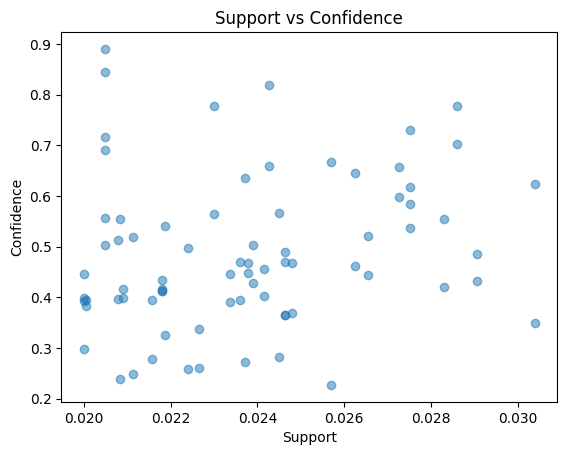

In [27]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

In [ ]:
#How would you interpret an itemset with a support value of 0.05?
    #In the case displayed in the scatter plot 0.05 is a very high value and would mean it is heavily supported, when i shifted min support to 0.05 nothing significant changed on the scatter plot.
#Why is it beneficial to filter frequent itemsets with low support?
    #Filtering frequent itemsets with low support helps to focus on the itemsets with greater support and remove noise from the data